In [1]:
path="/content/Reviews.csv"

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv(path)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df=df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'],axis=1)

In [6]:
print((df['Score']==5).sum()+(df['Score']==4).sum())
print((df['Score']==3).sum())
print((df['Score']==2).sum()+(df['Score']==1).sum())

443777
42640
82037


## Text Cleaning

In [7]:
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop_words = set(stopwords.words('english'))
# 1. Lowercase
df['Text'] = df['Text'].str.lower()
# 2. Remove non-word characters and digits
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\W+', ' ', str(x)))  # includes punctuation
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\d+', '', x))        # remove numbers (optional)
# 3. Remove stopwords
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

## Tokenization

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequences, maxlen=70, padding='post', truncating='post')

In [17]:
padded[0:2]

array([[  48,  213, 4543,  395,   32,   12,  109,   42,    4,   91,    7,
         496,    3, 2436, 1032,  324,  489,   31, 4961, 1609, 8284,    7,
          31,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   7,  255, 2025, 5452, 1783,  932,  932,  150,   99,  904, 3382,
         113, 2984, 1413, 2036, 7556,    7, 5452,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]], dtype=int32)

## Data Visualization

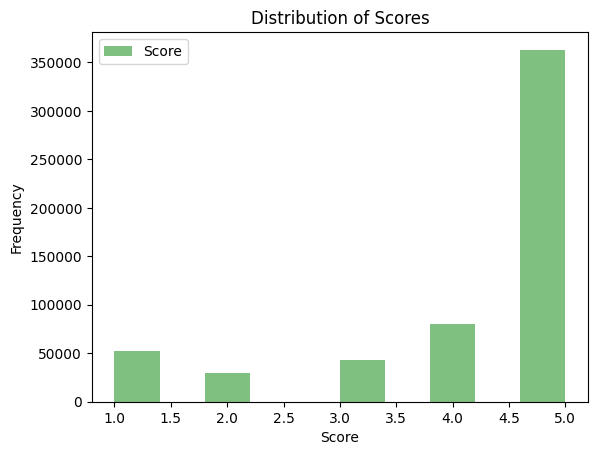

In [19]:
plt.hist(df['Score'],color='green',alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(['Score'])
plt.title('Distribution of Scores')
plt.show()

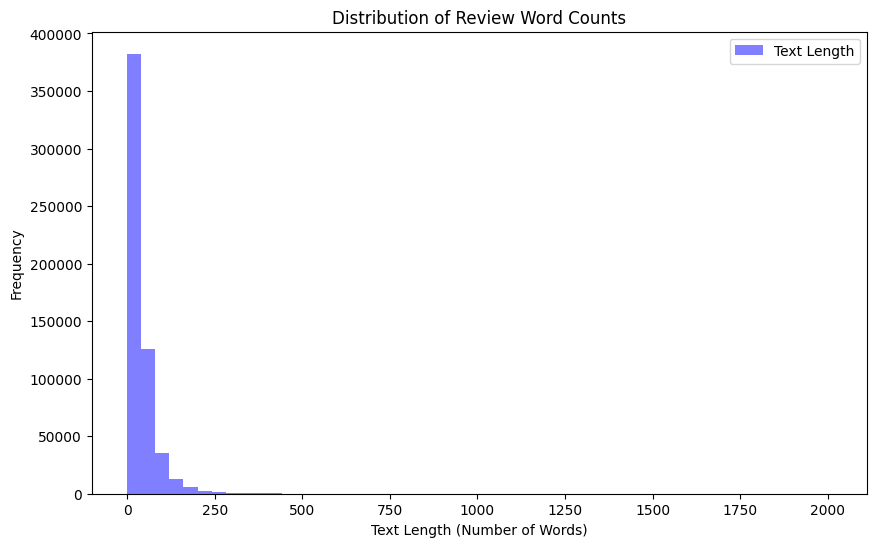

In [ ]:
review_lengths = df['Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
plt.hist(review_lengths, bins=50, color='blue', alpha=0.5)
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Word Counts')
plt.legend(['Text Length'])
plt.show()

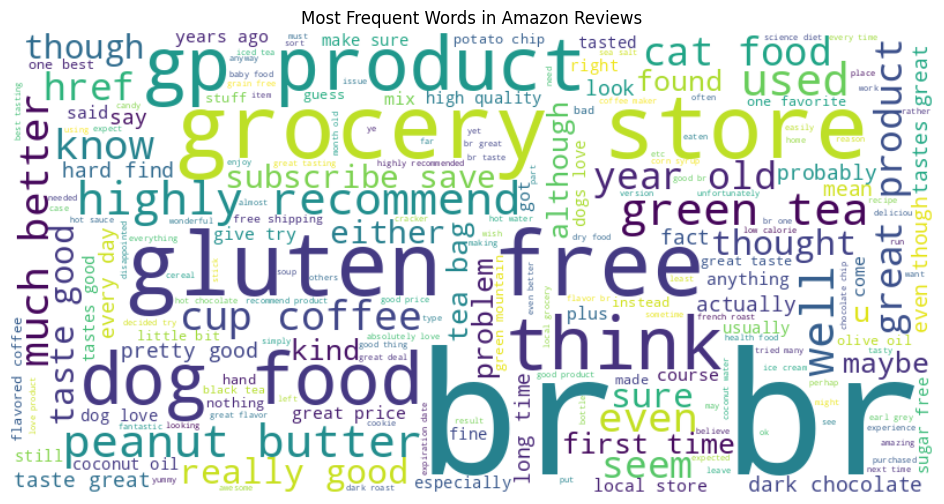

In [ ]:
from wordcloud import WordCloud

# Combine all reviews into one string
all_text = ' '.join(df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Amazon Reviews')
plt.show()

## Data Prepare

In [20]:
def map_sentiment(score):
    if score <= 2:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['label'] = df['Score'].apply(map_sentiment)

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [29]:
labels = np.array(df['label'])
labels = to_categorical(labels, num_classes=3)

In [83]:
X_train, X_val, y_train, y_val = train_test_split(
    padded, labels, test_size=0.2, random_state=42, stratify=labels
)

## Model Training

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [84]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.6),
    Dense(32, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax')
])

In [85]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [92]:
history=model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=2,
    batch_size=64,
    verbose=0        # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

In [93]:
loss, accuracy = model.evaluate(X_val, y_val)

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8917 - loss: 0.3177


In [94]:
preds = model.predict(X_val)
pred_labels = preds.argmax(axis=1) # Convert predicted probabilities to class labels or reverse one-hot encoder

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step


In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy_score(y_val.argmax(axis=1), pred_labels)
classification_report(y_val.argmax(axis=1), pred_labels)

'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77     16407\n           1       0.60      0.38      0.47      8528\n           2       0.92      0.97      0.94     88756\n\n    accuracy                           0.89    113691\n   macro avg       0.78      0.69      0.73    113691\nweighted avg       0.88      0.89      0.88    113691\n'

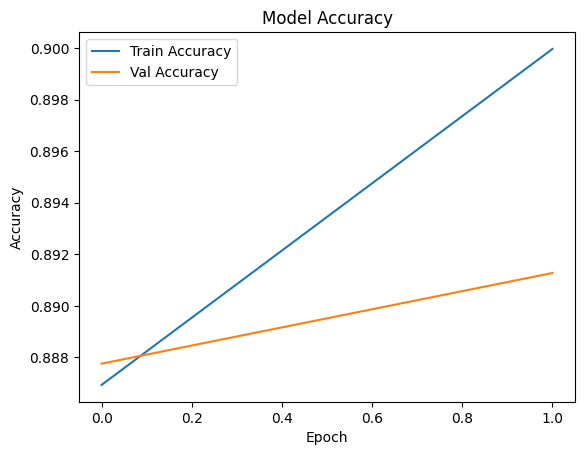

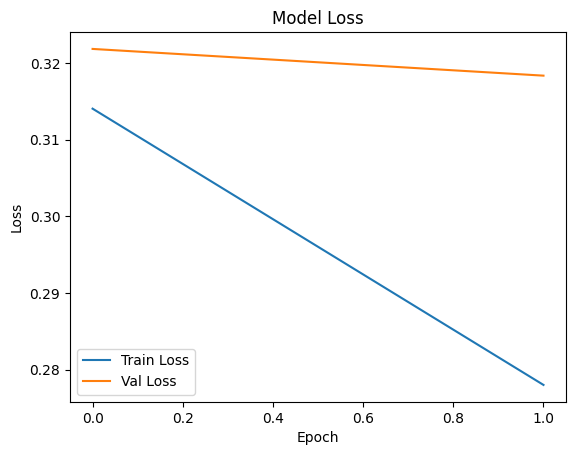

In [96]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
# Save model
model.save("model.keras")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

## Test

In [121]:
# Load model and tokenizer
import pickle

model = tf.keras.models.load_model("model.keras", compile=False)

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Test input
review = input("Enter a review: ")

# Preprocess
sequence = tokenizer.texts_to_sequences([review])
padded = pad_sequences(sequence, maxlen=70, padding='post', truncating='post')

# Predict
pred = model.predict(padded)
sentiment = "Positive" if pred[0][0] < 0.5 else "Negative"
confidence = pred[0][0] if pred[0][0] > 0.5 else 1 - pred[0][0]

print(f"Prediction: {sentiment} ({confidence:.2%} confidence)")

Enter a review: good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Prediction: Positive (96.34% confidence)
